In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


### Import the CSV dataset as Dataframe :

In [4]:
df = pd.read_csv('data/stud.csv')

### Show the top 5 rows:

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape

(1000, 8)

### Preparing X and Y variables :

In [7]:
X = df.drop(columns = ['math score'], axis = 1)

In [8]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [9]:
y = df['math score']

### Create Column Transformer with 3 types of transformers:

In [10]:
num_features = X .select_dtypes(exclude = "object").columns
cat_features = X .select_dtypes(include = "object").columns

In [11]:
num_features

Index(['reading score', 'writing score'], dtype='object')

In [12]:
cat_features

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [13]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [14]:
numeric_transformer  = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
        
    ]
)

In [15]:
X = preprocessor.fit_transform(X)

In [16]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

### Separate dataset into train and test :

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2,random_state =42)

In [18]:
X_train.shape,X_test.shape

((800, 19), (200, 19))

### Create and Evaluate function to give all metrics after model training :

In [19]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae,rmse,r2_square

In [20]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K-Neighboor Regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "XGBoostregressor" : XGBRegressor(),
    "CatBoostRegressor" : CatBoostRegressor(),
    "AdaBosstregressor" : AdaBoostRegressor()
}

In [21]:
model_list = []
r2_list = []

In [24]:
models.values()

dict_values([LinearRegression(), Lasso(), Ridge(), KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor(), XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), <catboost.core.CatBoostRegressor object at 0x000002482781EE80>, AdaBoostRegressor()])

In [25]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    model_train_mae,model_train_rmse,model_train_r2 = evaluate_model(y_train,y_train_pred)
    
    model_test_mae,model_test_rmse,model_test_r2 = evaluate_model(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model performance for training set")
    print("- Root Mean Squred Error :  {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error :  {:.4f}".format(model_train_mae))
    print("- R2 Score :  {:.4f}".format(model_train_r2))
    
    print("-"*40)
    
    print("Model performance for testing set")
    print("- Root Mean Squred Error :  {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error :  {:.4f}".format(model_test_mae))
    print("- R2 Score :  {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print("-"*40)
    print("\n")
    
    
    

Linear Regression
Model performance for training set
- Root Mean Squred Error :  5.3244
- Mean Absolute Error :  4.2671
- R2 Score :  0.8743
----------------------------------------
Model performance for testing set
- Root Mean Squred Error :  5.3960
- Mean Absolute Error :  4.2158
- R2 Score :  0.8803
----------------------------------------


Lasso
Model performance for training set
- Root Mean Squred Error :  6.5938
- Mean Absolute Error :  5.2063
- R2 Score :  0.8071
----------------------------------------
Model performance for testing set
- Root Mean Squred Error :  6.5197
- Mean Absolute Error :  5.1579
- R2 Score :  0.8253
----------------------------------------


Ridge
Model performance for training set
- Root Mean Squred Error :  5.3233
- Mean Absolute Error :  4.2650
- R2 Score :  0.8743
----------------------------------------
Model performance for testing set
- Root Mean Squred Error :  5.3904
- Mean Absolute Error :  4.2111
- R2 Score :  0.8806
--------------------------

### Results:

In [31]:
list(zip(model_list,r2_list))

[('Linear Regression', 0.8803449074540941),
 ('Lasso', 0.8253197323627853),
 ('Ridge', 0.8805931485028737),
 ('K-Neighboor Regressor', 0.7838129945787431),
 ('Decision Tree', 0.72893715089768),
 ('Random Forest Regressor', 0.857008348921479),
 ('XGBoostregressor', 0.8277965653186071),
 ('CatBoostRegressor', 0.8516318920747058),
 ('AdaBosstregressor', 0.8498077750858118)]

In [33]:
pd.DataFrame(list(zip(model_list,r2_list)),columns = ['Model Name','R2_Score']).sort_values(by = ["R2_Score"],ascending = False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880345
5,Random Forest Regressor,0.857008
7,CatBoostRegressor,0.851632
8,AdaBosstregressor,0.849808
6,XGBoostregressor,0.827797
1,Lasso,0.825320
3,K-Neighboor Regressor,0.783813
4,Decision Tree,0.728937


### Linear Regression:

In [36]:
lin_model = LinearRegression(fit_intercept = True)
lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score =r2_score(y_pred,y_test)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 86.70


### Plot y_pred and y_test:

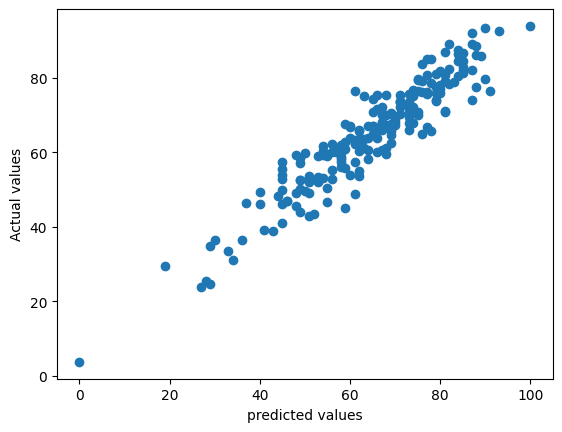

In [37]:
plt.scatter(y_test,y_pred)
plt.xlabel("predicted values")
plt.ylabel("Actual values")
plt.show()

<Axes: xlabel='math score'>

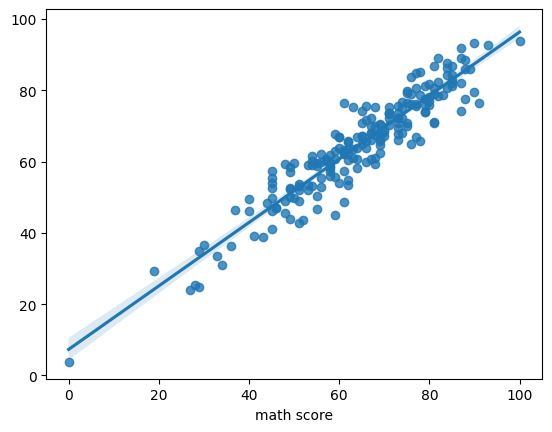

In [39]:
sns.regplot(x = y_test,
            y = y_pred)


In [41]:
pred_df = pd.DataFrame({"Predicted values" : y_pred,
                        "Actual values": y_test,
                        "difference" : y_test-y_pred})

In [42]:
pred_df

,Predicted values,Actual values,difference
521,76.507812,91,14.492188
737,58.953125,53,-5.953125
740,76.960938,80,3.039062
660,76.757812,74,-2.757812
411,87.539062,84,-3.539062
...,...,...,...
408,43.546875,52,8.453125
332,62.031250,62,-0.031250
208,67.976562,74,6.023438
613,67.132812,65,-2.132812
